In [45]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

### Import CSV files 

In [2]:
df_heart = pd.read_csv('https://raw.githubusercontent.com/kcsaba92/my_csv_files/master/Heart.csv')

In [3]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Data Cleaning

In [4]:
# Checking for missing values

df_heart.isnull().sum()

#great there are no missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# Checking for data types

df_heart.info()

# 14 variables, 303 observations, only 1 column is float and the rest is int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Change some of the variables name

df=df_heart.rename(columns={'cp':'pain_type', 'trestbps': 'rest_bp', 'fbs':'fast_bp', 'restecg':'test_ecg', 'thalach':'max_hr',
       'exang ':'ex_angina', 'oldpeak':'st_depression', 'ca':'number_vessels', 'target':'heart_des'})

## Data Exploration

How many are suffering from heart disease? Also, plot the stats.


The number of patients suffering from heart desiese is: 165 out of 303 which is 54.46 % of the total sample.



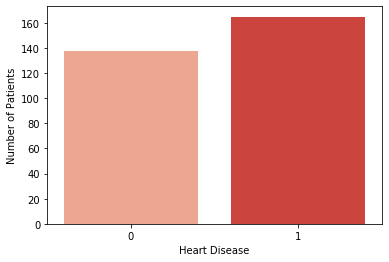

In [7]:
print('')
print('The number of patients suffering from heart desiese is:', df.heart_des.value_counts()[1],'out of',len(df.heart_des),'which is',np.round((df.heart_des.value_counts()[1]/len(df.heart_des))*100,decimals=2),'% of the total sample.')
print('')
sns.countplot(df.heart_des,palette='Reds')
plt.xlabel('Heart Disease')
plt.ylabel('Number of Patients')
plt.show()

What is the split up by gender for the patients

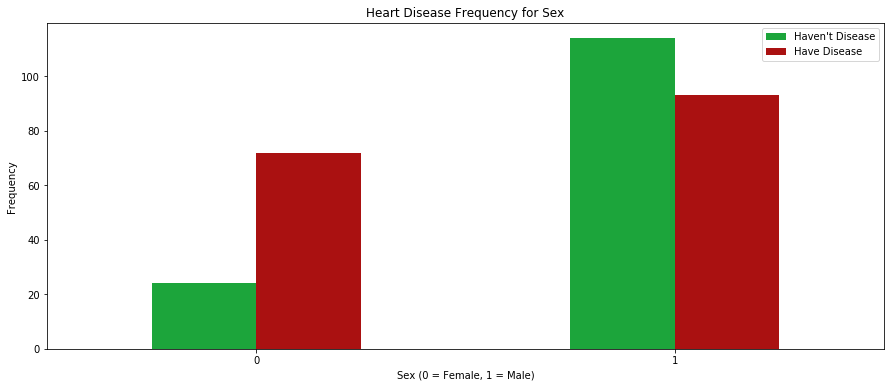

In [8]:
# Easier way to show Gender-wise Diseased and No-Disease population
pd.crosstab(df.sex,df.heart_des).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

Visualize frequency distribution of the thalach (max heart rate) variable and find what is the heart rate and heart disease relation.

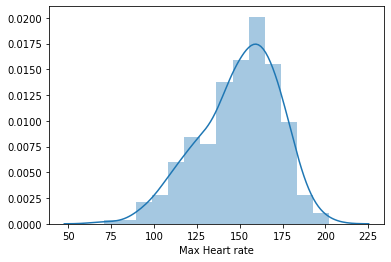

In [9]:
sns.distplot(df.max_hr)
plt.xlabel('Max Heart rate')
plt.show()

In [10]:
import scipy.stats as stats
import statsmodels as sm
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [11]:
# To check wheter the distribution is normal or not I will conduct a Shapiro test
t,p=stats.shapiro(df.max_hr)
print('Since the p-value,',np.round(p,decimals=4),'is less than 0.05, we reject the Null Hypothesis. This implies that the distribution is normal.')

Since the p-value, 0.0001 is less than 0.05, we reject the Null Hypothesis. This implies that the distribution is normal.


In [12]:
print('The data is left-skewed with a Kurtosis of:',np.round(df.max_hr.kurtosis(),decimals=4))

The data is left-skewed with a Kurtosis of: -0.062


In [13]:
print("The pearson's correlation between heart desease and max heart rate is", np.round(df.heart_des.corr(other=df.max_hr),decimals=4))

The pearson's correlation between heart desease and max heart rate is 0.4217


There is positive correlation between max heart rate and heart desease. In Pearson r a 0.43 considred a moderate correlation. 

Hypothesis test of mean heart rate of patients with and without heart Disease

𝐻0:𝜇𝐻𝑒𝑎𝑟𝑡𝑅𝑎𝑡𝑒𝑂𝑓𝐻𝑒𝑎𝑟𝑡𝐷𝑖𝑠𝑒𝑎𝑠𝑒=𝜇𝐻𝑒𝑎𝑟𝑡𝑅𝑎𝑡𝑒𝑂𝑓𝑁𝑜𝐻𝑒𝑎𝑟𝑡𝐷𝑖𝑠𝑒𝑎𝑠𝑒 

𝐻1:𝜇𝐻𝑒𝑎𝑟𝑡𝑅𝑎𝑡𝑒𝑂𝑓𝐻𝑒𝑎𝑟𝑡𝐷𝑖𝑠𝑒𝑎𝑠𝑒!=𝜇𝐻𝑒𝑎𝑟𝑡𝑅𝑎𝑡𝑒𝑂𝑓𝑁𝑜𝐻𝑒𝑎𝑟𝑡𝐷𝑖𝑠𝑒𝑎𝑠𝑒 

Forming two groups and testing for normality of both the groups.

In [15]:
g1=df[df.heart_des==0]
g2=df[df.heart_des==1]
t1,p1=stats.shapiro(g1.max_hr)
t2,p2=stats.shapiro(g2.max_hr)
print('The p-value for shapiro test of group 1 (no heart desease) :',np.round(p1,decimals=4))
print('The p-value for shapiro test of group 2 (has heart desease) :',np.round(p2,decimals=4))

The p-value for shapiro test of group 1 (no heart desease) : 0.4253
The p-value for shapiro test of group 2 (has heart desease) : 0.0004


<i>Since group 2 has a p-value less than 0.05, we reject the null and state that <b>Group 2 is NOT normal distribution</b>.</i>

<i>However, group 1 has a p-value more than 0.05, we fail to reject the null and state that <b>Group 1 has a normal distribution</b>.</i>

<i>Now we perform <b>Mannwhitneyu Test</b> to find if the mean of both the group are the same or NOT</i>

In [16]:
t,p=stats.mannwhitneyu(g1.chol,g2.chol)
print('The p-value for Mannwhitneyu test :',np.round(p,decimals=4))

The p-value for Mannwhitneyu test : 0.0179


Since the p-value is less than 0.05, we reject the null and state that The mean heart rates of both the groups is NOT the same.

Now we perform post-hoc analysis to analyse the mean heart rates of both the groups

In [17]:
print('The mean heart rate of patients without a heart disease:',np.round(g1.max_hr.mean(),decimals=2))
print('The mean heart rate of patients with a heart disease:',np.round(g2.max_hr.mean(),decimals=2))

The mean heart rate of patients without a heart disease: 139.1
The mean heart rate of patients with a heart disease: 158.47


In [18]:
X=df.max_hr
Y=df.heart_des
import statsmodels.api as sm 
from statsmodels.api import add_constant

XC=sm.add_constant(X,has_constant = 'add')
result=sm.Logit(Y,XC).fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.592833
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              heart_des   No. Observations:                  303
Model:                          Logit   Df Residuals:                      301
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Feb 2021   Pseudo R-squ.:                  0.1398
Time:                        12:38:27   Log-Likelihood:                -179.63
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 2.160e-14
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.3915      0.987     -6.475      0.000      -8.326      -4.457
max_hr         0.0440      0.

<i>Conclusion : With a unit increase in max heart rate, there is a <b>*4.4 %*</b> increase in probablity of a heart disease.</i>

## Correlations 

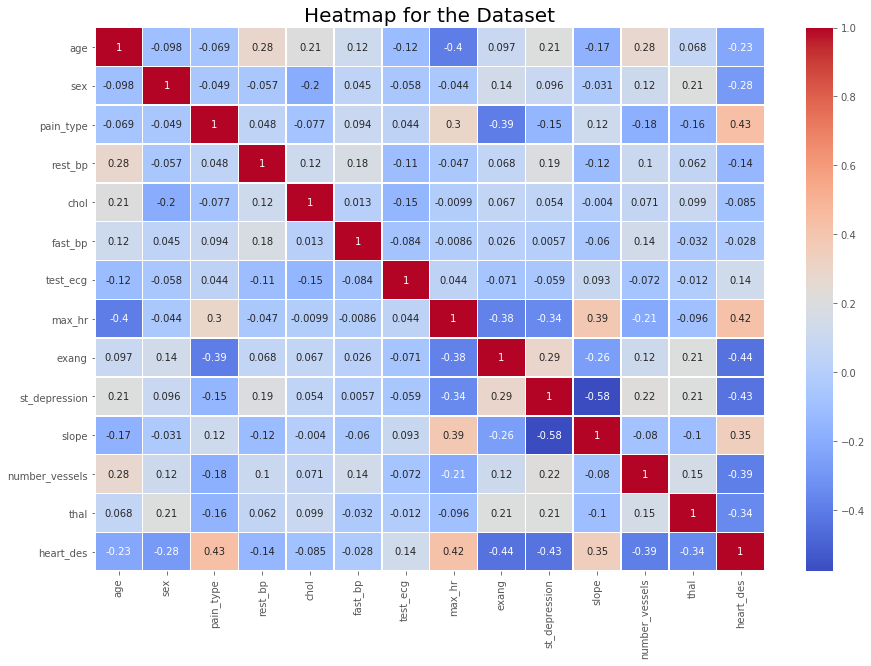

In [19]:
# making a heat map across all variables

plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('ggplot')

sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', linewidths=0.5)
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

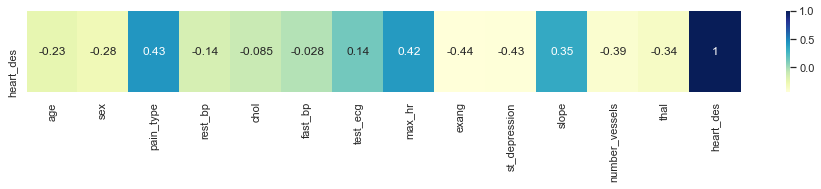

In [20]:
# Correlation with only target variables
sns.set(rc={'figure.figsize':(16,1.5)})
sns.heatmap(pd.DataFrame(pd.DataFrame(df.corr()).heart_des).T,annot=True, cmap='YlGnBu')
plt.show()

<b>5. Find Mean,Min & Max of age and plot its distribution. </b>

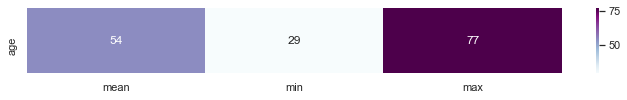

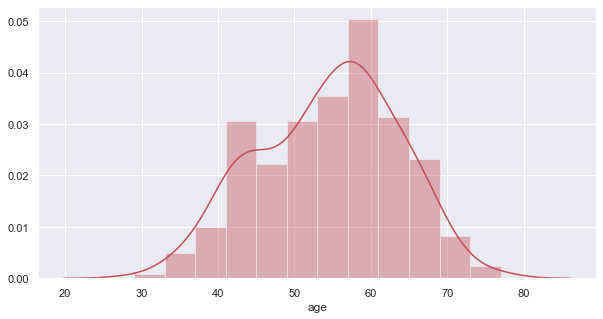

In [22]:
sns.set(rc={'figure.figsize':(12,1.2)})
sns.heatmap((pd.DataFrame(df.age.describe()).T)[['mean', 'min', 'max']], annot=True,  cmap='BuPu')
plt.show()
print('')
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(df.age, color='r')
plt.show()

<b>6. Age and its relation to heart disease. Is a particular set age of population(say age group 40-50) prone to heart disease than the rest of population age (50+)?  </b>

In [24]:
print("The pearson's correlation between heart disease and age is", np.round(df.heart_des.corr(other=df.age),decimals=4))

The pearson's correlation between heart disease and age is -0.2254


<i>Since the age and max heart rate are negatively correlated, chances of Heart disease decrease with increase in age.</i>

<b><i>Hypothesis test of mean age of patients with and without heart disease</i></b>
<p>
 <li>$H_0:\mu_{AgeOfHeart disease}=\mu_{AgeOfNo Heart disease}$
 <li>$H_1:\mu_{AgeOfHeart disease}!=\mu_{AgeOfNo Heart disease}$
     
<i>Forming two groups and testing for normality of both the groups.</i>
</p>

In [25]:
g1=df[df.heart_des==0]
g2=df[df.heart_des==1]
t1,p1=stats.shapiro(g1.age)
t2,p2=stats.shapiro(g2.age)
print('The p-value for shapiro test of group 1 :',np.round(p1,decimals=4))
print('The p-value for shapiro test of group 1 :',np.round(p2,decimals=4))

The p-value for shapiro test of group 1 : 0.0029
The p-value for shapiro test of group 1 : 0.1211


Since for only the first group the p-value is less than 0.05, we reject the null and state that One of the groups are NOT normal.

Now we perform Mannwhitneyu Test to find if the mean of both the group are the same or NOT

In [26]:
t,p=stats.mannwhitneyu(g1.age,g2.age)
print('The p-value for Mannwhitneyu test :',np.round(p,decimals=10))

The p-value for Mannwhitneyu test : 1.71926e-05


Since the p-value is less than 0.05, we reject the null and state that The mean age of both the groups is NOT the same.

Now we perform post-hoc analysis to analyse the mean age of both the groups

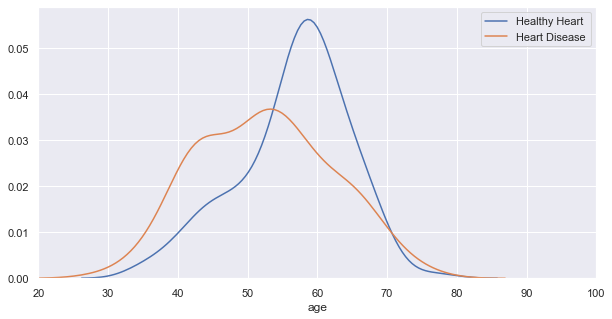

In [27]:
df_age_target = df[df.heart_des == 1]
df_age_target = df_age_target[['age','heart_des']]


df_age_target_0 = df[df.heart_des == 0]
df_age_target_0 = df_age_target_0[['age','heart_des']]

fig, ax = plt.subplots()
sns.distplot(df_age_target_0.age, hist = False, kde = True, label='Healthy Heart ')
sns.distplot(df_age_target.age, hist = False, kde = True, label='Heart Disease')

ax.set_xlim(20,100)
plt.show()

In [28]:
import numpy as np
print('The mean age of patients without a heart desiese:',np.round(df.age.mean(),decimals=2))
print('The mean age of patients with a heart desiese:',np.round(df.age.mean(),decimals=2))

The mean age of patients without a heart desiese: 54.37
The mean age of patients with a heart desiese: 54.37


<i>Now, we interpret the model coefficients</i>

In [29]:
X=df.age
Y=df.heart_des
XC=sm.add_constant(X)
result=sm.Logit(Y,XC).fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.663138
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              heart_des   No. Observations:                  303
Model:                          Logit   Df Residuals:                      301
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Feb 2021   Pseudo R-squ.:                 0.03778
Time:                        12:44:32   Log-Likelihood:                -200.93
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 7.128e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0362      0.756      4.014      0.000       1.554       4.519
age           -0.0524      0.

So, we can conclude that with an unit increase in age from minimum age (29),there is a 5.2 % decrease in probablity of a heart disease. Hence, younger population groups say (age group 40-50) are slightly more prone to heart diseases than it's elder group (age group say 50-60)

<b> Plot chest pain type pie chart.</b>

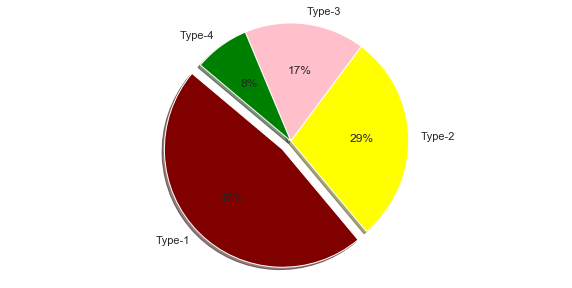

In [30]:
labels = 'Type-1', 'Type-2', 'Type-3', 'Type-4'
counts = list(df.pain_type.value_counts().values)
colors = ['maroon', 'yellow', 'pink', 'green']
explode = (0.1, 0, 0, 0)  # explode 1st slice
plt.pie(counts, explode=explode, labels=labels, colors=colors,
autopct='%1.0f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

<b>People suffer Type-1 Chest pain more than other types </b>

# Machine Learning Models

## Prepare dataset

In [32]:
y_target = df['heart_des']
var_data = df.drop('heart_des', axis = 1)

In [33]:
# Categorical variables need : ONE HOT ENCODING 
var_data = pd.get_dummies(var_data, drop_first=True)
print(var_data.head())

   age  sex  pain_type  rest_bp  chol  fast_bp  test_ecg  max_hr  exang  \
0   63    1          3      145   233        1         0     150      0   
1   37    1          2      130   250        0         1     187      0   
2   41    0          1      130   204        0         0     172      0   
3   56    1          1      120   236        0         1     178      0   
4   57    0          0      120   354        0         1     163      1   

   st_depression  slope  number_vessels  thal  
0            2.3      0               0     1  
1            3.5      0               0     2  
2            1.4      2               0     2  
3            0.8      2               0     2  
4            0.6      2               0     2  


In [34]:
# Train and Test datasets

from sklearn.model_selection import train_test_split
x = var_data
y = y_target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# getting the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (227, 13)
Shape of x_test : (76, 13)
Shape of y_train : (227,)
Shape of y_test : (76,)


## SVM

In [36]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

SVC(kernel='linear')

In [37]:
y_pred = svclassifier.predict(x_test)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[24  9]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        33
           1       0.82      0.93      0.87        43

    accuracy                           0.84        76
   macro avg       0.85      0.83      0.83        76
weighted avg       0.85      0.84      0.84        76



In [39]:
# Let's implement Gridsearch to see if model improves
from sklearn.model_selection import learning_curve,GridSearchCV
param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}

In [40]:
grid = GridSearchCV(SVC(),param_grid, verbose=2)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................. C=1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.5s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [41]:
grid_predictions = grid.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[24  9]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        33
           1       0.82      0.93      0.87        43

    accuracy                           0.84        76
   macro avg       0.85      0.83      0.83        76
weighted avg       0.85      0.84      0.84        76



<b>Conclusion The Model remained the same and not much change after GridSearch hence we can keep any of them</b>

## Decesion Tree

In [42]:
from sklearn import tree, metrics
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [43]:
# use the model to make predictions with the test data
y_pred = dtree.predict(x_test)
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 18
Accuracy: 0.76


## Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = RandomForestClassifier(n_estimators = 50, max_depth = 6,random_state=123)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_pred_quant = model.predict_proba(x_test)[:, 1]
y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.9779735682819384
Testing Accuracy : 0.8552631578947368


              precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.85      0.91      0.88        43

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76



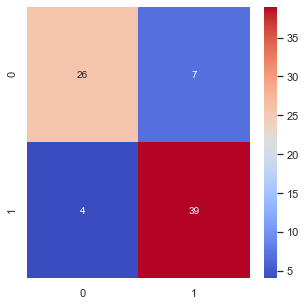

In [48]:
# cofusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':10}, cmap = 'coolwarm')

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

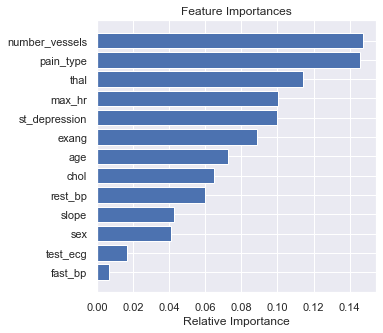

In [49]:
features = x.columns

importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## In conclusion, we can see Random Forest has highest accuracy 